#### Required Libraries

In [ ]:
import re
import os
import pandas as pd
import tweepy as tw
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
from PIL import Image

#### API keys

In [2]:
consumer_key = 'VLSwlijj2Y5m4bLNTnosARYsa'
consumer_secret = 'NofpgRiJ0BAYUj89Djyk0vZqW0oeybDYHBF4uq5fWaQIUsdoML'
access_token = '1404716555347193856-fWOV9VJgd3slsCsY2RhQVN1qoCBIlF'
access_token_secret = 'u6p4uRbRHDYmIAg2SJaeCawRCushxmUnMBxHJTockRhsp'

#### Authentication

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

#### Defining the Hashtag to be searched.

In [4]:
# Define the search term
search_words = "#TwitterTakeover"
new_search = search_words + " -filter:retweets"

#### Collecting the tweets.

In [7]:
# Collect tweets
tweets = tw.Cursor(api.search,
                       q=new_search,
                       lang="en",
                       since_id=0, count= 500).items()

# Collect a list of tweets
public_tweets = [tweet.text for tweet in tweets]

#### Tweets.

In [8]:
public_tweets

["At this point I really don't know what @elonmusk is up to with the #TwitterTakeover drama.  But, that's OK.  I'm ju… https://t.co/DFNOCsvTgt",
 '80 Billion | #TwitterTakeover | #TwitterExposed | #sabinus | #NnamdiKanu | #UCLfinal| UnderWorld | Olamide | Bale |… https://t.co/tvhBHFFLbL',
 'https://t.co/7ss3XW4eai\n\n80 Billion | #TwitterTakeover | #TwitterExposed | #sabinus | #NnamdiKanu | #UCLfinal| Unde… https://t.co/sw4iQi6IuV',
 'Hello. Project Veritas has exposed another Twitter employee. Have a nice day. #TwitterExposed #TwitterTakeover https://t.co/aSyUFEFu4W',
 'Purging of Conservatives continues as @elonmusk considers a #TwitterTakeover #Michigan patriot https://t.co/ttQk3UmqaL',
 'Elon Musk doesn’t want to buy #Twitter ranymore, but Twitter should make him pay for it \n\n#TwitterTakeover\n\nhttps://t.co/Itcb9UNzoW',
 'What do you think this guys reaction will be when he finds out he’s trending? #TwitterExposed #TwitterTakeover https://t.co/VSjJi3FdZ7',
 'Cut them off silentl

In [9]:
len(public_tweets)

3260

#### Preprocessing the tweets.

In [43]:
def preprocessing_text(text):
    text = text.lower()                     # converting upper case to lower case
    text = re.sub(r'\d+', '', text)         # removing numbers
    text = re.sub('[^a-zA-Z]', ' ', text)   # removing punctuations
    text = re.sub(r'\s+', ' ', text)
    text = re.sub('http://\S+|https://\S+', '', text)
    return text

In [44]:
dataframe = []

for tweet in public_tweets:
    sublist = []
    tweet = preprocessing_text(tweet)
    analysis = TextBlob(tweet)
    if analysis.sentiment[0]>0:
        sublist.append(tweet)
        sublist.append(analysis.sentiment[0])
        sublist.append(analysis.sentiment[1])
        sublist.append('positive')
        dataframe.append(sublist)
        
    elif analysis.sentiment[0]<0:
        sublist.append(tweet)
        sublist.append(analysis.sentiment[0])
        sublist.append(analysis.sentiment[1])
        sublist.append('Negative')
        dataframe.append(sublist)
        
    else:
        sublist.append(tweet)
        sublist.append(analysis.sentiment[0])
        sublist.append(analysis.sentiment[1])
        sublist.append('Neutral')
        dataframe.append(sublist)

#### After preprocessing.

In [46]:
dataframe

[['at this point i really don t know what elonmusk is up to with the twittertakeover drama but that s ok i m ju https t co dfnocsvtgt',
  0.35,
  0.35,
  'positive'],
 [' billion twittertakeover twitterexposed sabinus nnamdikanu uclfinal underworld olamide bale https t co tvhbhfflbl',
  0.0,
  0.0,
  'Neutral'],
 ['https t co ssxweai billion twittertakeover twitterexposed sabinus nnamdikanu uclfinal unde https t co swiqiiuv',
  0.0,
  0.0,
  'Neutral'],
 ['hello project veritas has exposed another twitter employee have a nice day twitterexposed twittertakeover https t co asyufefuw',
  0.6,
  1.0,
  'positive'],
 ['purging of conservatives continues as elonmusk considers a twittertakeover michigan patriot https t co ttqkumqal',
  0.0,
  0.0,
  'Neutral'],
 ['elon musk doesn t want to buy twitter ranymore but twitter should make him pay for it twittertakeover https t co itcbunzow',
  0.0,
  0.0,
  'Neutral'],
 ['what do you think this guys reaction will be when he finds out he s trending

#### Creating dataframe.

In [47]:
data = pd.DataFrame(dataframe, columns = ['Tweet','Polarity','Subjectivity','Sentiment'])

In [48]:
data

,Tweet,Polarity,Subjectivity,Sentiment
0,at this point i really don t know what elonmus...,0.350000,0.350000,positive
1,billion twittertakeover twitterexposed sabinu...,0.000000,0.000000,Neutral
2,https t co ssxweai billion twittertakeover twi...,0.000000,0.000000,Neutral
3,hello project veritas has exposed another twit...,0.600000,1.000000,positive
4,purging of conservatives continues as elonmusk...,0.000000,0.000000,Neutral
...,...,...,...,...
3255,elonmusk better be talking about just europe ...,0.250000,0.300000,positive
3256,cold showers gt hot showers who ever needs to ...,-0.175000,0.925000,Negative
3257,thank you for all your support mytwitterannive...,0.000000,0.000000,Neutral
3258,twittertakeover twitter will open new venues ...,0.090909,0.469697,positive


In [49]:
data.to_csv('twitter_data.csv')

In [50]:
data['Sentiment'].value_counts()

Neutral     1402
positive    1223
Negative     635
Name: Sentiment, dtype: int64

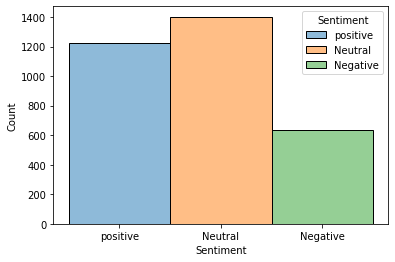

In [51]:
sns.histplot(data = data, x="Sentiment", hue = "Sentiment")
plt.show()

#### Word Cloud.

In [8]:
import pandas as pd
data = pd.read_csv(r'D:\New folder\Big Data Analytics Lab\Project\twitter_data.csv')

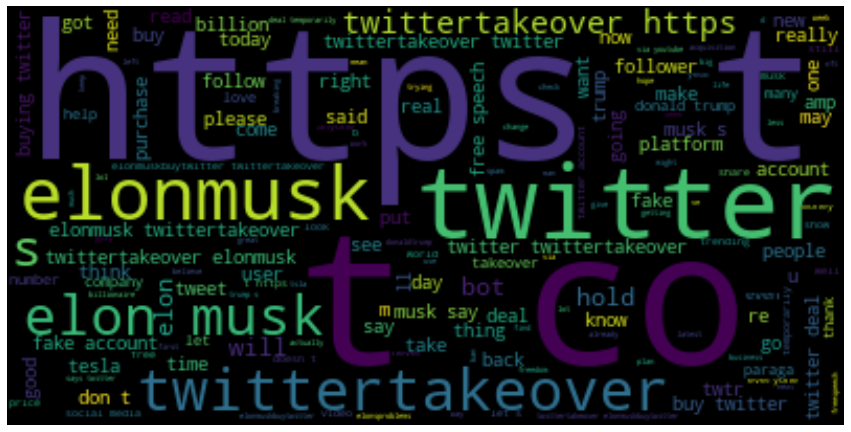

In [23]:
text = " ".join(i for i in data.Tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()